# FakeNewsDetection

In this notebook, we will be solving a use case of 'Fake News Detection' - Predict if a news published in an article is 'Real' or 'Fake' for a sample data using ML Algorithms!

**Note**: Update variables under **Variables** section if required before running the notebook. To run notebook cell by cell, click on a cell and click **Run** button below the Menu bar. Or to run all cells, select **Cell --> Run** All from Menu bar.

### Variables

In [7]:
#Specify the input filename
TRAINFILE=r"fake_news_train.csv"
TESTFILE=r"fake_news_test.csv"
#Specify the ratio of the data to subset for prediction
test_data_ratio = 0.05

#By default, EXPOSE_AS_API is False. 
#If it is True then this kit will be exposed as a rest API, and it can be consumed through URL http://127.0.0.1:5000/predict
EXPOSE_AS_API=False

#By default, TRAIN_MODEL is False and it uses pretrained model(fakenewsmodel.pkl). 
#If TRAIN_MODEL is True then it uses the training data to build new model which will be used for the prediction.
TRAIN_MODEL=True  

### Import libraries to detect fake news

In [8]:
from detect import FakeNewsDetection
from app import FakeNewsApiService

### Training

In [9]:
fakenews = FakeNewsDetection(TRAINFILE, test_data_ratio)

First few lines from the training dataset
                                           news_text label
0  Get the latest from TODAY Sign up for our news...  fake
1  2d  Conan On The Funeral Trump Will Be Invited...  fake
2  It’s safe to say that Instagram Stories has fa...  real
3  Much like a certain Amazon goddess with a lass...  real
4  At a time when the perfect outfit is just one ...  real
Training to test data ratio is  0.95  :  0.05


---Preprocessing data---
Actual dataframe shape (row X column)  (5063, 2)
Dataframe shape after removing duplicates  (4818, 2)
Dataframe shape after removal of empty row  (4818, 2)
Dataframe shape after preprocessing(eg. special character and stop words removal, stemming, etc.,) is:  (4818, 61672)
Splitting data into train and test set completed
Training the model (LogisticRegressionCV) on train set started...
Model training completed!
Classification Metrics for the train set is:

              precision    recall  f1-score   support

        real       0.87      0.96      0.92      2782
        fake       0.93      0.78      0.85      1795

    accuracy                           0.89      4577
   macro avg       0.90      0.87      0.88      4577
weighted avg       0.90      0.89      0.89      4577



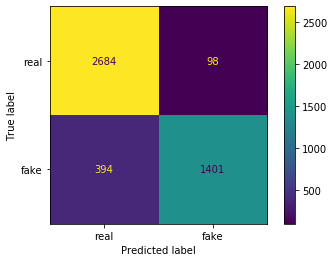

Testing the model on the test set
Classification Metrics for the test set is:

              precision    recall  f1-score   support

        real       0.75      0.94      0.84       157
        fake       0.78      0.43      0.55        84

    accuracy                           0.76       241
   macro avg       0.77      0.68      0.69       241
weighted avg       0.76      0.76      0.74       241



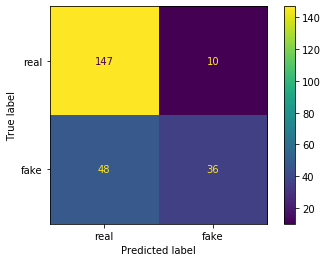

(4577, 61672)
(241, 61672)
(4577,)
(241,)


In [10]:
if TRAIN_MODEL:
    fakenews.train_model()

###  Prediction

In [11]:
fakenews.test_news(TESTFILE)

Predicted result is available in  C:\Users\ABHILASH\Desktop\New folder (2)\fakenews-detection-main\fake_news_test_output.csv


# FakeNewsDetection API Service
The following code exposes this solution as a rest API. This feature can be turn on by setting the variable EXPOSE_AS_API=True. Input and output details along with the endpoint URL details are given below.

#### Prediction API url
POST http://127.0.0.1:5000/predict 

#### API input
| Field | Description | Example |
| :- | :- | :- |
| news_text | News text from the article | "BGMI not Banned In India; Here's What Google And Krafton Said" |

Example json 
```
{ 
    "news_text": "BGMI not Banned In India; Here's What Google And Krafton Said"
}
```

#### API output
| Field | Description | Example |
|:-- | :-- | :-- |
| news_text | News text from the article | "BGMI not Banned In India; Here's What Google And Krafton Said" |
|label | If the value is 'fake' it is Fake news.If the value is 'real' it is real news |"real"|
|probability | Confidence level of prediction |"0.79"|

Example json
```
{
    "label": "fake",
    "news_text": "BGMI not Banned In India; Here's What Google And Krafton Said",
    "probability": 0.79
}
```

In [12]:
if EXPOSE_AS_API:
    api=FakeNewsApiService()
    api.start()

This is a starter notebook for FakeNewsDetection using 'LogisticRegressionCV' model. More detailed code can be found in the **'FakeNewsDetection-analysis.ipynb'** notebook in the current directory.